Python 3.12.4 on my machine

# IMPORTS

In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MNIST Dataset

In [52]:
# manually load dataset 
data = np.load('./datasets/mnist.npz')          # n times of 28x28 matrices
x_train, x_test = data['x_train'], data['x_test']
#(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing 32 bit values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape, x_test.shape)

print("We want to combine 2nd and 3rd dimensions to get 28*28 =", 28*28, "for our input space of neural network.")
x_train = x_train.reshape(len(x_train), x_train.shape[1]**2)
x_test = x_test.reshape(len(x_test), x_test.shape[1]**2)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28) (10000, 28, 28)
We want to combine 2nd and 3rd dimensions to get 28*28 = 784 for our input space of neural network.
(60000, 784)
(10000, 784)


# Creating the Architecture of an Autoencoder

In [53]:
# This is our input image
input_img = Input(shape=(784,))

a1 = Dense(units=256, activation='relu')(input_img)
a2 = Dense(units=128, activation='relu')(a1)
a3 = Dense(units=64, activation='relu')(a2)


# "encoded" is the encoded representation of the input
encoded = Dense(units=32, activation='relu')(a3)

b1 = Dense(units=64, activation='relu')(encoded)
b2 = Dense(units=128, activation='relu')(b1)
b3 = Dense(units=256, activation='relu')(b2)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(b3)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.summary()

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 784)            │       201,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489,136 (1.87 MB)

 Trainable params: 489,136 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0085 - loss: 0.3258 - val_accuracy: 0.0068 - val_loss: 0.1657
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0117 - loss: 0.1570 - val_accuracy: 0.0102 - val_loss: 0.1369
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0099 - loss: 0.1345 - val_accuracy: 0.0086 - val_loss: 0.1279
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0101 - loss: 0.1244 - val_accuracy: 0.0110 - val_loss: 0.1175
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0122 - loss: 0.1176 - val_accuracy: 0.0109 - val_loss: 0.1130
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0122 - loss: 0.1125 - val_accuracy: 0.0147 - val_loss: 0.1094
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0131 - loss: 0.1088 - val_accuracy: 0.0151 - val_loss: 0.1060
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0131 - loss: 0.1061 - 

In [55]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
predicted = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


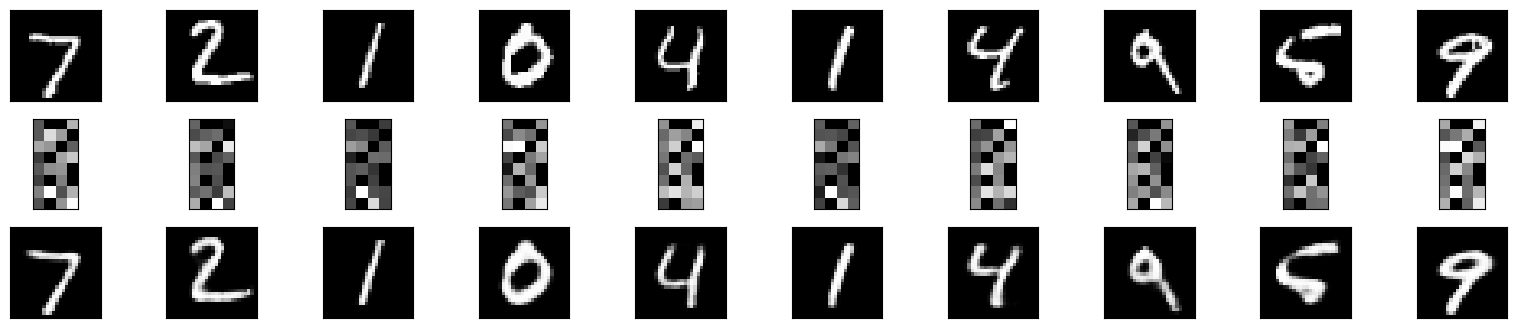

In [56]:
n = 10  # How many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, 20, 2*20 + i + 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()